# ЛИСТОК 7

Задача 1

Семь монет подбрасывались одновременно 1536 раз, причем каждый раз отмечалось число X выпавших гербов. В таблице приведены числа nj случаев, когда число выпавших гербов было равно xj. Пользуясь критерием χ2, проверить согласие гипотезы о наличии биномиального закона распределения с опытными данными. Учесть, что вероятность выпадения герба при бросании каждой из монет равна 0,5. Уровень значимости принять равным 0,05.

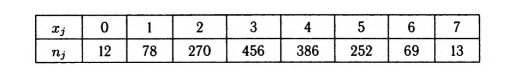

In [ ]:
import numpy as np
from scipy.stats import binom, chisquare, binomtest, mannwhitneyu, wilcoxon, ranksums


n = 1536
m = 7
p = 0.5
a = 0.05 #уровень значимости

observed = [12, 78, 270, 456, 386, 252, 69, 13]
expected = []
for i in range(m + 1):
  expected.append(binom.pmf(i, m, p) * n)
p_value = chisquare(observed, expected)[1]

print (chisquare(observed, expected))

if (a < p_value):
  print ('Но не отвергается')
else:
  print ('Но отвергается')

Power_divergenceResult(statistic=10.314285714285688, pvalue=0.1714516975623399)
Но не отвергается


Задача 2

С помощью критерия знаков проверьте гипотезу о том, что две следующие выборки однородны: 0,20 1,72 0,27 0,88 1,51 0,68 1,86 0,59 1,12 0,30 и 0,89 0,04 0,75 0,88 0,24 0,03 0,47 0,60 0,37 0,77

In [ ]:
a = [0.20, 1.72, 0.27, 0.88, 1.51, 0.68, 1.86, 0.59, 1.12, 0.30]
b = [0.89, 0.04, 0.75, 0.88, 0.24, 0.03, 0.47, 0.60, 0.37, 0.77]
alpha = 0.05 #уровень значимости

diff = np.sign(np.array(a) - np.array(b))
pos = np.sum(diff > 0)
neg = np.sum(diff < 0)
print ('positive ', pos)
print ('negative ', neg)

n = len(a)
p_value = binomtest(pos, pos+neg, p=0.5)

if p_value.pvalue > alpha:
  print ('Но не отвергается')
else:
  print ('Но отвергается')

positive  5
negative  4
Но не отвергается


Задача 3



Рассмотрим последовательность из 25 испытаний. Пусть результаты этих испытаний следующие (1 пишется в случае успеха и 0 в случае неудачи): 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 С помощью критерия знаков проверьте гипотезу о том, что вероятность успеха равна 0.5

In [ ]:
a = [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
alpha = 0.05 #уровень значимости
p = 0.5

success = sum(a)
total = len(a)
fails = total - success
print (success, ' ', total, ' ', fails)
print ('sign test ', min(success, fails))

p_value = (binom.cdf(success, total, p) + (1 - binom.cdf(total - success - 1, total, p)))
print (p_value)

if p_value > alpha:
  print ('Но не отвергается')
else:
  print ('Но отвергается')

19   25   6
sign test  6
1.9959226846694946
Но не отвергается


Задача 4




Цена за квадратный метр в объявлениях о продаже квартир в городе равна: 0,85 0,96 0,95 0,03 0,33 0,63 0,12, а в поселке-спутнике – равна: 0,51 0,63 0,76 С помощью критерия Манна-Уитни проверьте гипотезу о том, что цены на жильё в городе и поселке-спутнике одинаковы.


In [ ]:
a = [0.85, 0.96, 0.95, 0.03, 0.33, 0.63, 0.12]
b = [0.51, 0.63, 0.76]

#критерий Манна-Уитни
p_value = mannwhitneyu(a, b)[1]
a = 0.05

print (p_value, ' ', a)
if (a < p_value):
  print ('Но не отвергается')
else:
  print ('Но отвергается')

1.0   0.05
Но не отвергается


Задача 5



Доля замужних женщин на трех предприятиях составляет: 0.52, 0.42, 0.31, а в 10 офисах: 0.28, 0.94, 0.71, 0.00, 0.21, 0.07, 0.66 С помощью критерия Уилкоксона проверьте гипотезу о том, что число замужних женщин имеет распределение, не зависящее от места работы.

In [ ]:
a = [0.52, 0.42, 0.31]
b = [0.28, 0.94, 0.71, 0.00, 0.21, 0.07, 0.66]
#критерий Уилконсона
p_value = ranksums(a, b)[1]
a = 0.05

print (p_value, ' ', a)
if (a < p_value):
  print ('Но не отвергается')
else:
  print ('Но отвергается')

0.7324398999038725   0.05
Но не отвергается


Задача 6



Даны выборочные наблюдения за двумя случайными величинами: X: 5, 0, 3, 5, 1; Y: 4, 0, 7, 5, 3, 8, 6. С помощью критерия Уилкоксона (используя нормальную аппроксимацию и таблицу стандартного нормального распределения) проверьте нулевую гипотезу о равенстве распределений выборок X и Y для 94% уровня доверия против двусторонних альтернатив.

In [ ]:
a = [5, 0, 3, 5, 1]
b = [4, 0, 7, 5, 3, 8, 6]
#критерий
p_value = ranksums(a, b)[1]
alpha = 1 - 0.94 #уровень значимости

print (p_value, ' ', alpha)
if (alpha < p_value):
  print ('Но не отвергается')
else:
  print ('Но отвергается')

0.22322514530675575   0.06000000000000005
Но не отвергается


# ЛИСТОК 8


Задача 1

На 16 фермерских хозяйствах изучали два признака: X —количество прямых
договоров о поставках продукции и Y— количество кредитов, взятых в банках. Было
получено совместное статистическое распределение признаков:
Найти коэффициент корреляции r(X, Y).

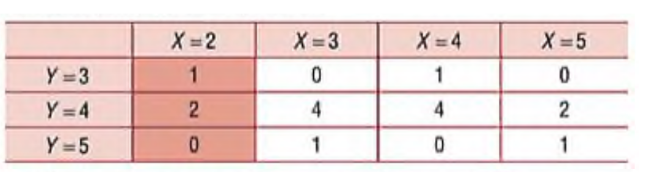

In [ ]:
import numpy as np
from scipy.stats import pearsonr, spearmanr

x_row = [1, 3, 4, 5]
y_row = [3, 4, 5]

table = np.array([[1, 0, 1, 0],
                 [2, 4, 4, 2],
                 [0, 1, 0, 1]])

x = np.repeat(x_row, np.sum(table, axis=0))
y = np.repeat(y_row, np.sum(table, axis=1))
cor = pearsonr(X, Y)[0]

print('коэффициент Пирсона: ', cor)

коэффициент Пирсона:  0.7636383358453562


Задача 2

По данным выборкам вычислить коэффициенты корреляции Пирсона и
Спирмена. Что можно сказать о связи между переменными X и Y?
(a) (0.7; 0), (1.1; 4), (1.2; 2)
(b) (1; 1), (2; 10), (3; 100)

In [ ]:
#вариант а
x = [0.7, 1.1, 1.2]
y = [0, 4, 2]

cor = pearsonr(x, y)[0]
cor2 = spearmanr(x, y)[0]

print('коэффициент Пирсона: ', cor)
print('коэффициент Спирмента: ', cor2)



#вариант б
print ('\n')

x = [1, 2, 3]
y = [1, 10, 100]

cor = pearsonr(x, y)[0]
cor2 = spearmanr(x, y)[0]

print('коэффициент Пирсона: ', cor)
print('коэффициент Спирмента: ', cor2)

коэффициент Пирсона:  0.7559289460184546
коэффициент Спирмента:  0.5


коэффициент Пирсона:  0.9041944301794649
коэффициент Спирмента:  1.0


Задача 3

Вычислить значения коэффициента корреляции, если известно, что:
∑ x = 35; ∑ y = 136; ∑ x ∙ у = 2806.5; ∑ x2 = 2038; ∑ y2 = 36804.4; п = 50.
Дать толкование полученным результатам.

In [ ]:
sumX = 35
sumY = 136
sumXY = 2806.5
sumX2 = 2038
sumY2 = 36804.4
n = 50

cor = (n * sumXY - sumX * sumY) / ((n * sumX2 - sumX ** 2)**0.5 * (n * sumY2 - sumY ** 2)**0.5)

print('коэффициент корреляции: ', cor)

коэффициент корреляции:  0.31655229705018634


Задача 4

В магазине в течение 5 дней проводились наблюдения за продажей постельного
белья. В результате установлено соответствие между числом покупок простыней (X) и
подушек (Y):

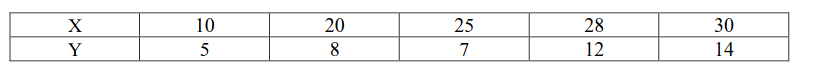

В предположении, существования линейной зависимости между факторами вычислить
значение коэффициента корреляции, дать толкование полученным результатам

In [ ]:
x = [10, 20, 25, 28, 30]
y = [5, 8, 7, 12, 14]

cor = pearsonr(x, y)[0]
print ('коэффициент корреляции: ', cor)


if 0.3 < abs(cor) < 0.5:
    print('умеренная линейная зависимость')
elif 0.5 < abs(cor) < 0.7:
    print('заметная линейная зависимость')
elif 0.7 < abs(cor) < 0.9:
    print('сильная линейная зависимость')
elif 0.9 < abs(cor):
    print('очень сильная линейная зависимость')
else:
    print('очень слабая линейная зависимость или её отсутствие')

коэффициент корреляции:  0.8574471096478982
сильная линейная зависимость


Задача 5

 По результатам тестирования 10 студентов по двум дисциплинам А и В на
основе набранных баллов получены следующие ранги (см. таблицу), где
r i и s i — ранги i-го объекта по переменным X и Y).
Вычислить ранговый коэффициент корреляции Спирмена и проверить его значимость на
уровне 𝛼 = 0.05.

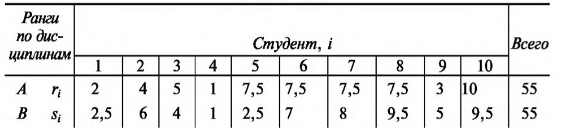

In [ ]:
a = [2, 4, 5, 1, 7.5, 7.5, 7.5, 7.5, 3, 10]
b = [2.5, 6, 4, 1, 2.5, 7, 8, 9.5, 5, 9.5]
alpha = 0.05

cor = spearmanr(a, b)[0]
p_value = spearmanr(a, b)[1]

print ('коэффициент корреляции: ', cor)
print ('p_value: ', p_value)

if p_value < alpha:
    print('коэффициент корреляции значим при a = 0.05')
else:
    print('коэффициент корреляции незначим при a = 0.05')

коэффициент корреляции:  0.7549559195942357
p_value:  0.011592967847086947
коэффициент корреляции значим при a = 0.05


# ЛИСТОК 6

Задача 1

Пусть дана выборка {𝑥 1 , . . . , 𝑥 𝑛 } и известно что это результаты независимых
экспериментов, а соответствующая случайная величина 𝜉 распределена с параметрами
E[𝜉] = 𝜇 и D[𝜉] = 𝑑. Проверьте несмещённость и состоятельность оценки
для 𝜇: 𝜇̂ 1 (𝑥 1 , . . . , 𝑥 𝑛 ) = 0.21𝑥 1 + 0.38𝑥 2 + 0.7𝑥 3

In [31]:
import numpy as np
from scipy import stats
from scipy.stats import chisquare

с = np.array([0.21, 0.38, 0.7]) # коэффициенты
m = 1 #матожидание
d = 1  #дисперсия

#сумма коэффициентов должна быть 1 для несмещённой оценки
c_sum = np.sum(c)
if c_sum == 1:
    print('оценка несмещённая')
else:
    print('оценка смещённая')

#состоятельность оценки
d = np.sum(c ** 2) * d

print('дисперсия оценки: ', d)

#дисперсия должна быть больше 0 для того, чтобы оценка была состоятельной
if d > 0:
    print('оценка состоятельная')
else:
    print('оценка несостоятельная')

оценка смещённая
дисперсия оценки:  4.060419946872063
оценка состоятельная


Задача 2

Длину гласной обычно можно считать распределенной по нормальному закону.
При измерении длины долгой гласной в диалекте некоторого языка были получены
следующие значения в миллисекундах: 210; 310; 250; 320. Вы работаете с хорошо
изученным языком и известно, что для основного варианта дисперсия долгих
гласных 𝜎2 = 12100.
(a) Построить доверительный интервал для средней длины долгой гласной в
диалекте на уровне доверия 95%.
(b) То же на уровне доверия 99%.
(c) Сколько элементов нужно выбрать, чтобы уменьшить длину доверительного
интервала в 3 раза?

In [27]:
length = [210, 310, 250, 320]
s = np.sqrt(12100)
alpha1 = 1 - 0.95
alpha2 = 1 - 0.99

mean = sum(length) / len(length)

#z-критическое
z1 = stats.norm.ppf(1 - alpha1 / 2) # 95%
z2 = stats.norm.ppf(1 - alpha2 / 2) # 99%

#доверительные интервалы
i1 = z1 * s / (len(length) ** 0.5)
i2 = z2 * s / (len(length) ** 0.5)

print('при уровне доверия 95%: ', mean - i1, mean + i1)
print('при уровне доверия 99%: ', mean - i2, mean + i2)
print('нужно выбрать элементов: ', len(length) * 3 ** 2)

при уровне доверия 95%:  164.70198085029705 380.29801914970295
при уровне доверия 99%:  130.8293883048105 414.1706116951895
нужно выбрать элементов:  36


Задача 3

Для проверки авторства текста можно использовать часто встречающиеся слова
(союзы, предлоги, некоторые характерные для конкретного корпуса текстов слова). Пусть
было отобрано 5 слов и, по имеющемуся корпусу текстов, их частоты даны во втором
столбце таблицы. В новом тексте количества встретившихся слов указаны в третьем
столбце таблицы. С помощью критерия 𝜒 2 проверить, можно ли считать, что
распределение этих слов такое же, как и в известном корпусе текстов автора.
Проверить нулевую гипотезу на уровнях значимости
а) 𝛼 = 1%
б) 𝛼 = 5%.

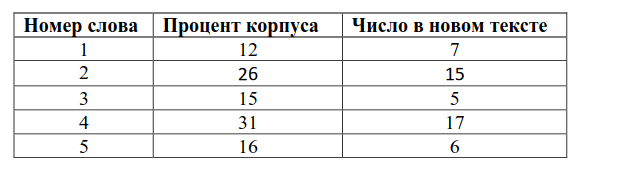

In [9]:
korp_procent = np.array([12, 26, 15, 31, 16])
new_number = [7, 15, 5, 17, 6]
a1 = 0.01
a2 = 0.05

#высчитываем ожидаемые частоты
expected = korp_procent / 100 * sum(new_number)

#критерий
p_value = chisquare(new_number, expected)[1]
print (p_value)

if (a1 < p_value):
  print ('Но не отвергается при a = 1%')
else:
  print ('Но отвергается при a = 1%')

if (a2 < p_value):
  print ('Но не отвергается при a = 5%')
else:
  print ('Но отвергается при a = 5%')

0.7444301656420882
Но не отвергается при a = 1%
Но не отвергается при a = 5%


Задача 4

Для оценки степени владения языком может использоваться оценка сложности,
например количество именных групп на одно высказывание. Для каждого испытуемого
такая величина усредняется и потому ее можно считать нормально распределенной.
(a) Пусть известно, что для взрослых в среднем этот показатель равен 1.7. Для
нескольких детей одной возрастной группы получены следующие значения: 1.7; 1.9; 1.1;
1.4; 1.2. Можно ли считать, что эти дети владеют языком так же хорошо, как взрослые? В
качестве критерия выбрать t-критерий Стьюдента и правильную (двустороннюю или
одностороннюю) альтернативу. Рассмотреть уровни значимости 10% и 5%;
(b) Пусть известно среднее для возрастной группы детей 8-9 лет и этот показатель
равен 1.4. У вас есть выборка детей этой же возрастной группы, но из одного конкретного
типа семей (нет понимания о влиянии этого фактора на развитие речи): 1.8; 1.9; 1.2; 2.7;
2.3. Можно ли считать, что эти дети владеют языком так же хорошо, как в общем дети их
возраста? В качестве критерия выбрать t-критерий Стьюдента и правильную
(двустороннюю или одностороннюю) альтернативу. Рассмотреть уровни значимости 10%
и 5%.

In [32]:
c = np.array([1.7, 1.9, 1.1, 1.4, 1.2]) #результаты детей
m = 1.7  #среднее взрослых
n = len(c)
mean = np.mean(c)
deviation = np.std(c, ddof=1)
alpha1 = 0.1
alpha2 = 0.05

#t-критерий Стьюдента
t_stat = (mean - m) / (deviation / np.sqrt(n)) #t-статистика
t_critical1 = stats.t.ppf(1 - alpha1 / 2, n-1) #t-критическое 1
t_critical2 = stats.t.ppf(1 - alpha2 / 2, n-1) #t-критическое 2

if abs(t_stat) < t_critical1:
  print ('Но не отвергается при alpha = 10%')
else:
  print ('Но отвергается при alpha = 10%')

if abs(t_stat) < t_critical1:
  print ('Но не отвергается при alpha = 5%')
else:
  print ('Но отвергается при alpha = 5%')

Но не отвергается при alpha = 10%
Но не отвергается при alpha = 5%


In [33]:
c = np.array([1.8, 1.9, 1.2, 2.7, 2.3]) #результаты детей
m = 1.4  #среднее взрослых
n = len(c)
mean = np.mean(c)
deviation = np.std(c, ddof=1)
alpha1 = 0.1
alpha2 = 0.05

#t-критерий Стьюдента
t_stat = (mean - m) / (deviation / np.sqrt(n)) #t-статистика
t_critical1 = stats.t.ppf(1 - alpha1 / 2, n-1) #t-критическое 1
t_critical2 = stats.t.ppf(1 - alpha2 / 2, n-1) #t-критическое 2

if abs(t_stat) < t_critical1:
  print ('Но не отвергается при alpha = 10%')
else:
  print ('Но отвергается при alpha = 10%')

if abs(t_stat) < t_critical1:
  print ('Но не отвергается при alpha = 5%')
else:
  print ('Но отвергается при alpha = 5%')

Но отвергается при alpha = 10%
Но отвергается при alpha = 5%


Задача 5

Рассмотрим расхождения между средней длиной словоформы в научно-
технической и деловой речи шести славянских языков (х, слав.яз = 6,13; S = 0,43) и средней
длиной словоформы в указанных стилях всех языков мира (х, всех яз = 7 = E(Х) = а).
Сформируем гипотезы:
H 0 : х, слав.яз = E(X),
H 1 : х, слав.яз ≠ E(X).
Для проверки гипотез использовать:
а) t-критерий Стьюдента;
б) Z-критерий нормального распределения.

In [23]:
n = 6 #число языков
x = 6.13
a = 7
s = 0.43
alpha = 0.05

#t-критерий Стьюдента
t1 = (x - a) / ((s / (n - 1) ** 0.5))
t2 = stats.t.ppf(1 - alpha, n-1) #t критическое

#z-критерий нормального распределения
z1 = (x - a) / ((s ** 2 / n) ** 0.5)
z2 = stats.norm.ppf((1 - alpha) / 2) #z критическое

print('по t критерию: ', t1, t2)
print('по z критерию: ', z1, z2)

if abs(t1) > t2: #t-критерий
    print('Но отвергается')
else:
    print('Но не отвергается')
if abs(z1) > z2: #z-критерий
    print('Но отвергается')
else:
    print('Но не отвергается')


по t критерию:  -4.5241375358716684 2.0150483733330233
по z критерию:  -4.955944363305501 -0.06270677794321385
Но отвергается
Но отвергается
